In [1]:
import pandas as pd
import time
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,recall_score,precision_score,roc_auc_score
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegresor
from sklearn.ensemble import RandomForestClassifier  # RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier #Adaptive Boost
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boost 
from sklearn.svm import SVC #SVC
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from IPython.display import Image  
from sklearn.tree import export_graphviz
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\kisho\DataScience\Machine Learning\Practice\cat1.csv")

In [3]:
data.head()

,Unnamed: 0,from_city_id,online_booking,mobile_site_booking,Car_Cancellation,from_datee,booking_month,weekend,timeOfDay,timeDifference,cancel_zone
0,6,15.0,0,0,0,1,1,0,2,0,1
1,17,15.0,1,0,0,12,1,1,1,-4,0
2,24,15.0,0,0,0,5,1,1,1,-6,0
3,158,1.0,1,0,0,4,1,0,2,-3,0
4,216,15.0,1,0,0,6,1,1,1,-2,0


In [4]:
data = data.drop('Unnamed: 0',axis=1)
data.head(3)

,from_city_id,online_booking,mobile_site_booking,Car_Cancellation,from_datee,booking_month,weekend,timeOfDay,timeDifference,cancel_zone
0,15.0,0,0,0,1,1,0,2,0,1
1,15.0,1,0,0,12,1,1,1,-4,0
2,15.0,0,0,0,5,1,1,1,-6,0


In [5]:
data.shape

(1589, 10)

In [6]:
data.columns

Index(['from_city_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_datee', 'booking_month', 'weekend',
       'timeOfDay', 'timeDifference', 'cancel_zone'],
      dtype='object')

In [7]:
names =['from_city_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_datee', 'booking_month', 'weekend',
       'timeOfDay', 'timeDifference', 'cancel_zone'],

dx = ['Cancel', 'notCancel']

In [8]:
X = data.loc[:,data.columns!='Car_Cancellation'].values
X

array([[ 15.,   0.,   0., ...,   2.,   0.,   1.],
       [ 15.,   1.,   0., ...,   1.,  -4.,   0.],
       [ 15.,   0.,   0., ...,   1.,  -6.,   0.],
       ...,
       [ 15.,   1.,   0., ...,   1., -16.,   0.],
       [ 15.,   0.,   0., ...,   2.,   3.,   1.],
       [ 15.,   0.,   0., ...,   3.,   4.,   0.]])

In [9]:
y = data.Car_Cancellation.values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
print("Shape of features set X: ",X.shape)
print("Shape of target Y: ",y.shape)

Shape of features set X:  (1589, 9)
Shape of target Y:  (1589,)


In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [12]:
print("Data of training features: ",x_train.shape)
print("Data of testing features: ",x_test.shape)
print("\n")
print("Data of training target: ",y_train.shape)
print("Data of testing target: ",y_test.shape)

Data of training features:  (953, 9)
Data of testing features:  (636, 9)


Data of training target:  (953,)
Data of testing target:  (636,)


In [13]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [14]:
x_train

array([[ 0.23792135, -0.8559949 , -0.14262753, ..., -0.64358516,
         0.32403891, -0.78483716],
       [ 0.23792135,  1.16823126, -0.14262753, ...,  0.57456113,
         0.05362816, -0.78483716],
       [ 0.23792135, -0.8559949 , -0.14262753, ...,  1.79270743,
         1.27047656, -0.78483716],
       ...,
       [ 0.23792135, -0.8559949 , -0.14262753, ..., -0.64358516,
        -0.2167826 , -0.78483716],
       [ 0.23792135, -0.8559949 , -0.14262753, ..., -0.03451201,
        -0.62239874, -0.78483716],
       [ 0.23792135, -0.8559949 , -0.14262753, ..., -0.64358516,
        -0.48719336, -0.78483716]])

In [15]:
x_test

array([[ 0.24251592, -0.87559504, -0.13266499, ..., -0.6764421 ,
        -0.55584048, -0.77395236],
       [ 0.24251592, -0.87559504, -0.13266499, ..., -0.6764421 ,
        -1.22284905,  1.22699765],
       [ 4.48279419, -0.87559504,  7.53778361, ..., -0.6764421 ,
        -0.02223362, -0.77395236],
       ...,
       [ 0.24251592, -0.87559504, -0.13266499, ..., -0.10661803,
         1.17838181, -0.77395236],
       [ 0.24251592, -0.87559504, -0.13266499, ..., -0.6764421 ,
        -0.28903705, -0.77395236],
       [ 0.24251592,  1.14208048, -0.13266499, ..., -0.6764421 ,
        -1.08944733, -0.77395236]])

In [16]:
#Model 1 - Logistic Regression
model_logreg = LogisticRegression(random_state=0)
model_logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [17]:
y_pred = model_logreg.predict(x_test)
y_pred[0:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
y_test[0:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
conf_matrix_logreg = confusion_matrix(y_test,y_pred)
conf_matrix_logreg

array([[629,   0],
       [  5,   2]], dtype=int64)

<Axes: >

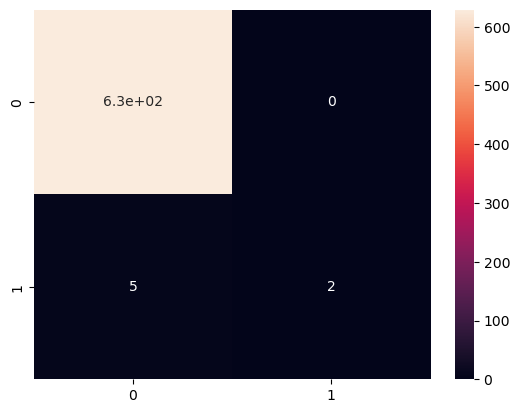

In [20]:
sns.heatmap(conf_matrix_logreg,annot=True)

In [21]:
accuracy_logreg = metrics.accuracy_score(y_test,y_pred)
accuracy_logreg

0.9921383647798742

In [22]:
precision_logreg = metrics.precision_score(y_test,y_pred)
precision_logreg

1.0

In [23]:
recall_logreg = metrics.recall_score(y_test,y_pred)
recall_logreg

0.2857142857142857

In [24]:
y_pred_proba = model_logreg.predict_proba(x_test)[::,1]
auc_logreg = metrics.roc_auc_score(y_test,y_pred_proba)
auc_logreg

0.9266409266409267

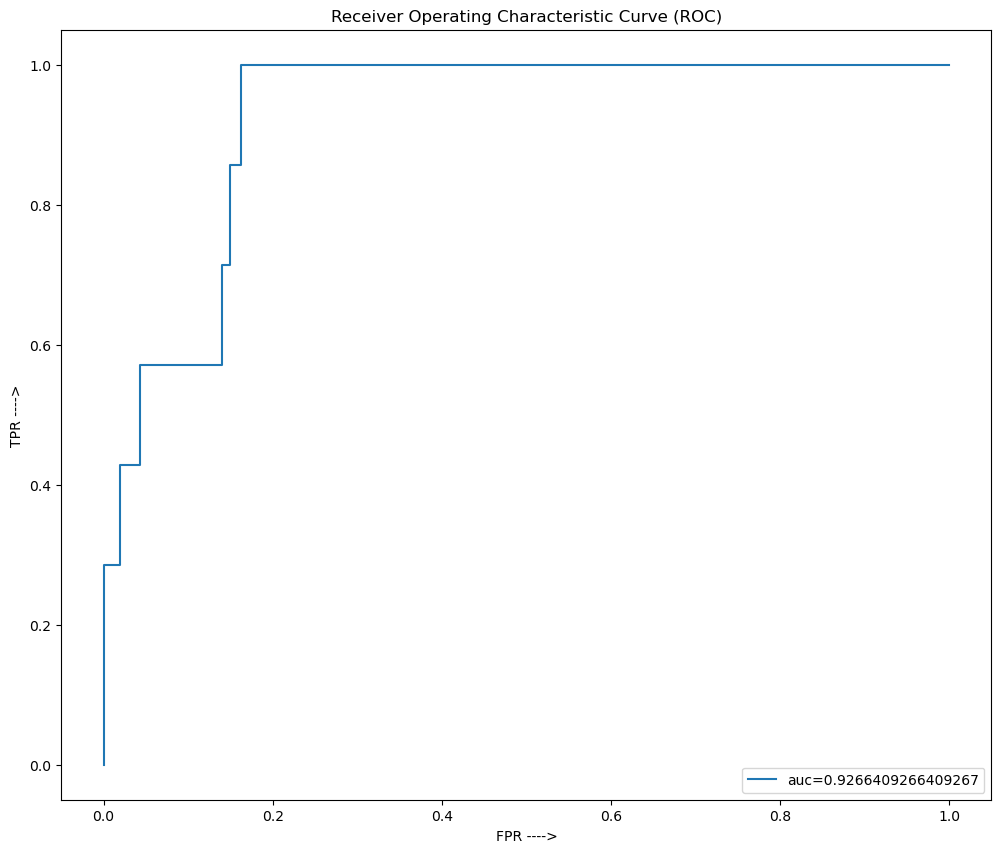

In [25]:
y_pred_proba = model_logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [26]:
model_dt2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt2.fit(x_train,y_train)

model_dt2_score_train = model_dt2.score(x_train,y_train)

model_dt2_score_test = model_dt2.score(x_test,y_test)

print('Training Score',model_dt2_score_train)

print('Testing Score',model_dt2_score_test)

Training Score 0.9863588667366212
Testing Score 0.9874213836477987


In [27]:
model_dt4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt4.fit(x_train,y_train)

model_dt4_score_train = model_dt4.score(x_train,y_train)

model_dt4_score_test = model_dt4.score(x_test,y_test)

print('Training Score',model_dt4_score_train)

print('Testing Score',model_dt4_score_test)

Training Score 0.9884575026232949
Testing Score 0.9827044025157232


In [28]:
model_dt6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt6.fit(x_train,y_train)

model_dt6_score_train = model_dt6.score(x_train,y_train)

model_dt6_score_test = model_dt6.score(x_test,y_test)

print('Training Score',model_dt6_score_train)

print('Testing Score',model_dt6_score_test)

Training Score 0.9958027282266527
Testing Score 0.9858490566037735


In [29]:
model_dt8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt8.fit(x_train,y_train)

model_dt8_score_train = model_dt8.score(x_train,y_train)

model_dt8_score_test = model_dt8.score(x_test,y_test)

print('Training Score',model_dt8_score_train)

print('Testing Score',model_dt8_score_test)

Training Score 0.9989506820566632
Testing Score 0.9842767295597484


In [30]:
model_dt4 = DecisionTreeClassifier(max_depth=4,criterion='entropy')

model_dt4.fit(x_train,y_train)

y_pred_dt4 = model_dt4.predict(x_test)
y_pred_proba_dt4 = model_dt4.predict_proba(x_test)[:,1]
# y_pred_dt

model_dt4_score_train = model_dt4.score(x_train,y_train)
print(model_dt4_score_train)

model_dt4_score_test = model_dt4.score(x_test,y_test)
print(model_dt4_score_test)

0.9853095487932844
0.9889937106918238


In [31]:
y_pred_dt4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
predictions = model_dt4.predict(x_test)
print(model_dt4.score(x_test,y_test))
y_actual_result = y_test[0]

0.9889937106918238


In [33]:
conf_matrix_dt = confusion_matrix(y_test,y_pred_dt4)
conf_matrix_dt

array([[629,   0],
       [  7,   0]], dtype=int64)

<Axes: >

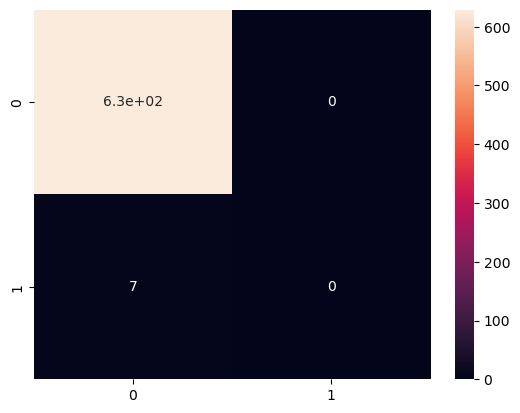

In [34]:
sns.heatmap(conf_matrix_dt,annot=True)

In [35]:
accuracy_dt = metrics.accuracy_score(y_test,y_pred_dt4)
accuracy_dt

0.9889937106918238

In [36]:
precision_dt = metrics.precision_score(y_test,y_pred_dt4)
precision_dt

0.0

In [37]:
recall_dt = metrics.recall_score(y_test,y_pred_dt4)
recall_dt

0.0

In [38]:
y_pred_proba = model_dt4.predict_proba(x_test)[::,1]
auc_dt = metrics.roc_auc_score(y_test,y_pred_proba)
auc_dt

0.6804451510333863

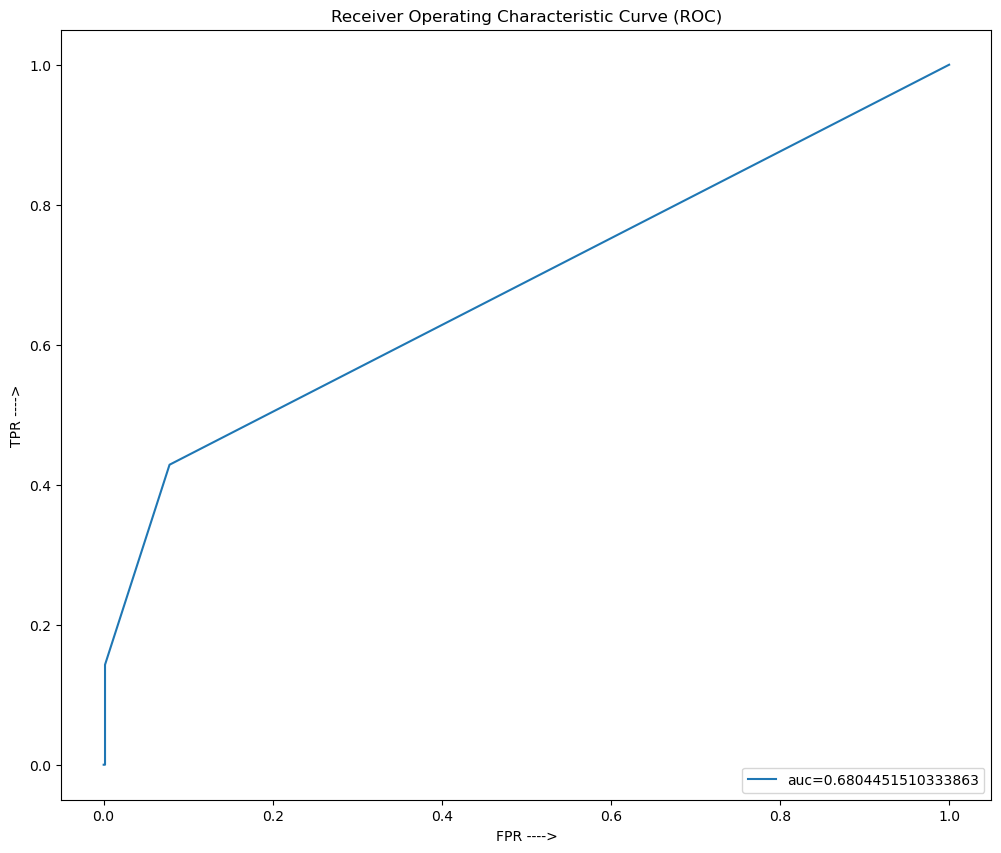

In [39]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [40]:
#Random forest classifier
data.columns

Index(['from_city_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_datee', 'booking_month', 'weekend',
       'timeOfDay', 'timeDifference', 'cancel_zone'],
      dtype='object')

In [41]:
names = ['from_city_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_datee', 'booking_month', 'weekend',
       'timeOfDay', 'timeDifference', 'cancel_zone']

dx = ['Cancel', 'NotCancel']

In [42]:
names_index = names[2:]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=40)

In [44]:
fit_rf = RandomForestClassifier(random_state=40)

In [45]:
fit_rf.set_params(criterion='gini',max_features = None,max_depth = 2)

RandomForestClassifier(max_depth=2, max_features=None, random_state=40)

In [46]:
#oob
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [47]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

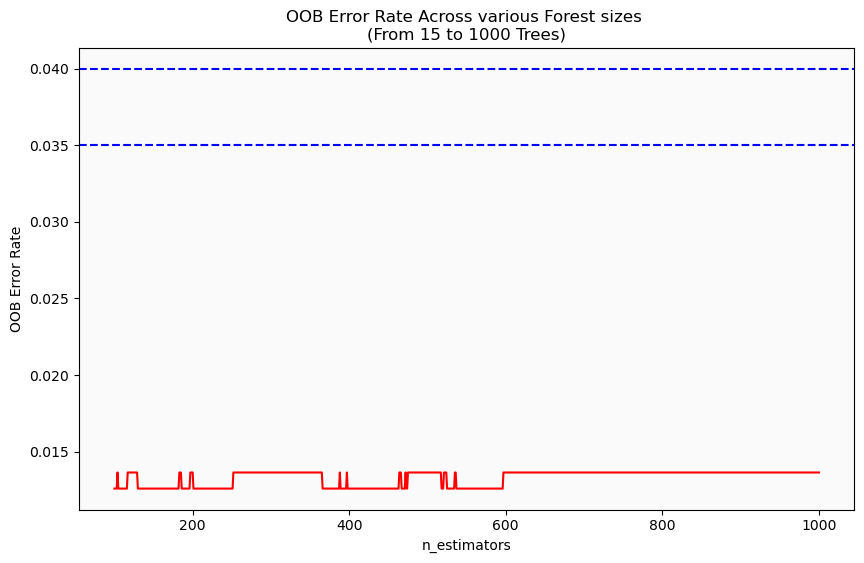

In [48]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.035,color='blue',linestyle='--')
plt.axhline(0.04,color='blue',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

In [49]:
print('OOB Error rate for 650 trees is: %0.5f'%oob_series[650])

OOB Error rate for 650 trees is: 0.01364


In [50]:
fit_rf.set_params(n_estimators=650,bootstrap=True,warm_start=False,oob_score=False)

RandomForestClassifier(max_depth=2, max_features=None, n_estimators=650,
                       random_state=40)

In [51]:

model_rf = fit_rf.fit(x_train,y_train)

In [52]:
y_pred_rf = fit_rf.predict(x_test)
print(y_pred_rf)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [53]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

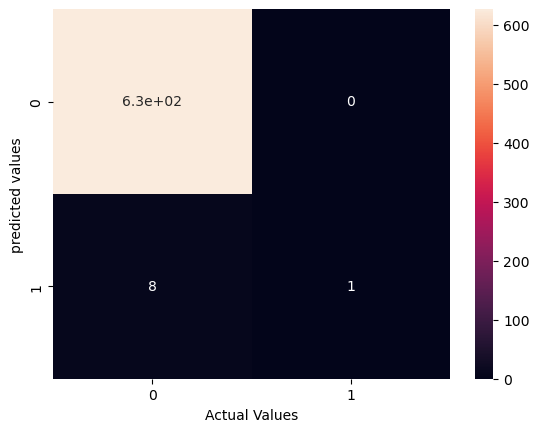

In [54]:
# confusion matrix
con_matrix_rf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(con_matrix_rf,annot = True)
plt.xlabel('Actual Values')
plt.ylabel('predicted values')
plt.show()

In [55]:
accuracy_rf = model_rf.score(x_test,y_test)
accuracy_rf

0.9874213836477987

In [56]:
precision_rf = metrics.precision_score(y_test,y_pred_rf)
precision_rf

1.0

In [57]:
recall_rf = metrics.recall_score(y_test,y_pred_rf)
recall_rf

0.1111111111111111

In [58]:
#AUC
predictions_proba = model_rf.predict_proba(x_test)[:,1]
fpr2, tpr2, _ = roc_curve(y_test,predictions_proba,pos_label=1)


In [59]:
auc_rf = metrics.auc(fpr2,tpr2)
auc_rf

0.8799397483608009

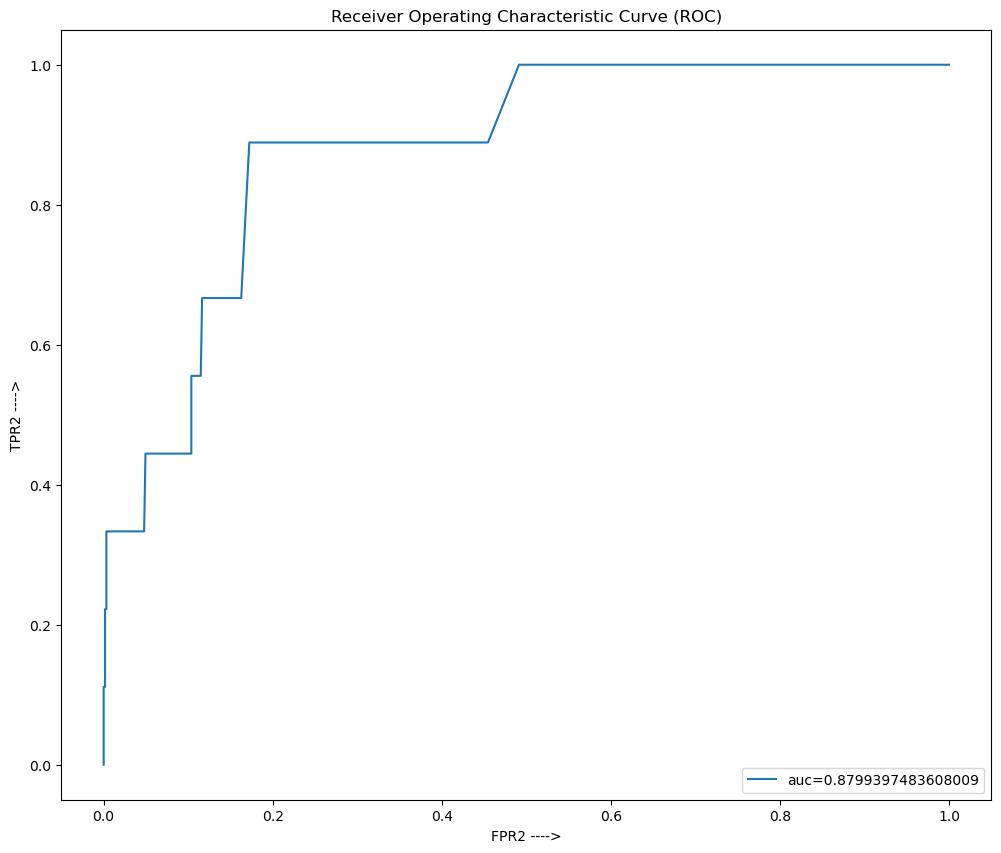

In [60]:
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr2,tpr2,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR2 ---->")
plt.ylabel("TPR2 ---->")
plt.show()

In [61]:
#Model 5 : Grdient Booster 
fit_gb = GradientBoostingClassifier(random_state = 40 )

In [62]:
# Hyper parameter tuning 
np.random.seed(40)
start = time.time()
parameters={

    'n_estimators' :[50,100,500],
    'learning_rate' : [0.001,0.1,1],
    'criterian' : ['friedman_mse','squared_error'],
    'max_features' : ['sqrt','log2'],
    'loss' : ['log_logs','exponential'],
    'max_depth':[2,3,4,5]
}

cv_gb = GridSearchCV(fit_gb,param_grid = parameters,cv = 10,n_jobs = 3)
cv_gb = fit(x_train,y_train)

print(cv_gb.best_params_)
end = time.time()
print("time taken to execute: %0.2f"%(end-start))
    

NameError: name 'fit' is not defined